# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [47]:
# Import numpy and pandas

import numpy as np
import pandas as pd
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# Challenge 1 

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [9]:
# df.head()

sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [5]:
# df.info()
# There is no missing data

sensor.isna().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [6]:
# df.shape()
# There are 1752 rows and 12 columns

sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [35]:
# pd.date_range()
# when trying to set up the 4 variables (start, end, periods and freq) I receive a warning that I cna just set 3 of them

new_index = pd.date_range(start='1/1/2018 00:00:00', end ='1/1/2018 00:29:10', periods = len(sensor))

Assign the time series index to the dataframe's index.

In [36]:
# df.set_index()

sensor.set_index(new_index, inplace=True)

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

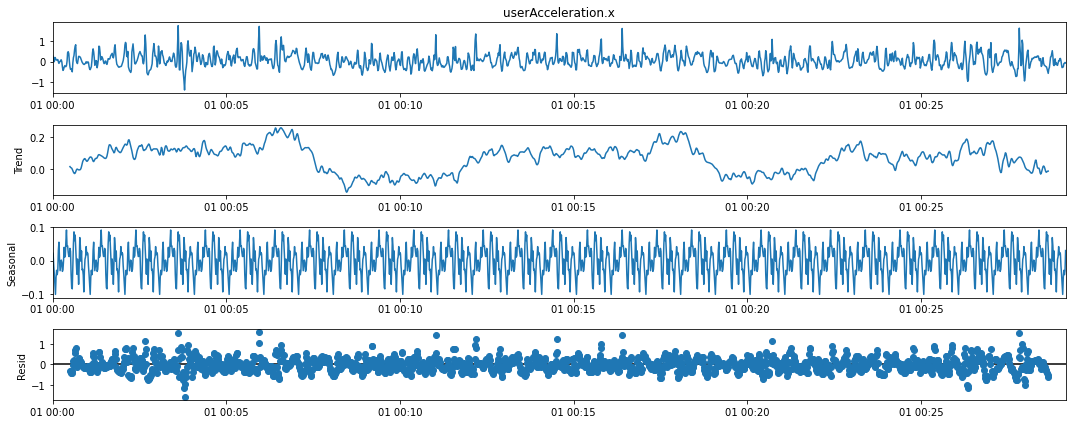

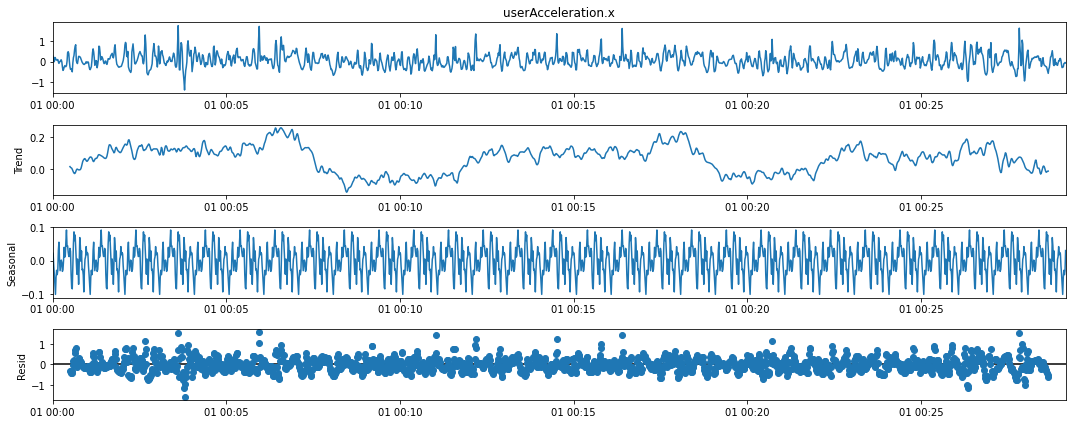

In [59]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the dataframe with the target column 'userAcceleration.x'
ts1 = sensor['userAcceleration.x']
decomposition1 = seasonal_decompose(ts1, period=60)
decomposition1.plot()

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

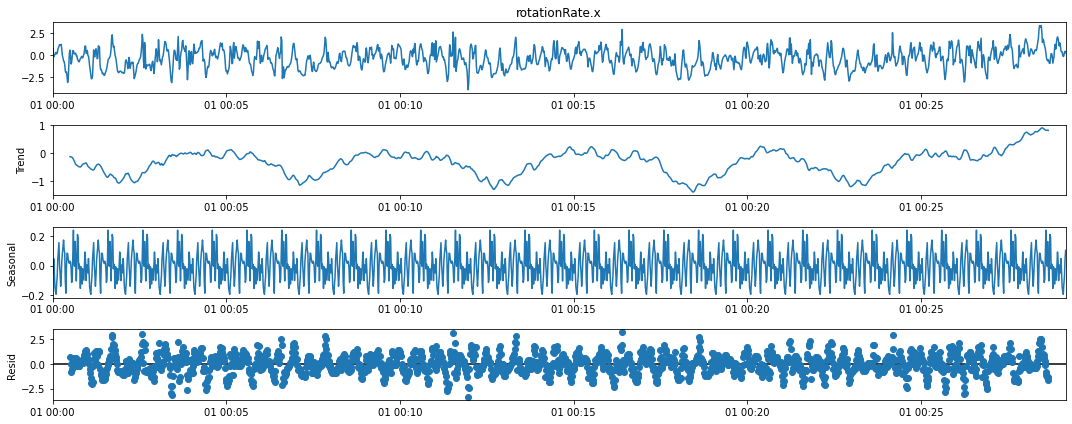

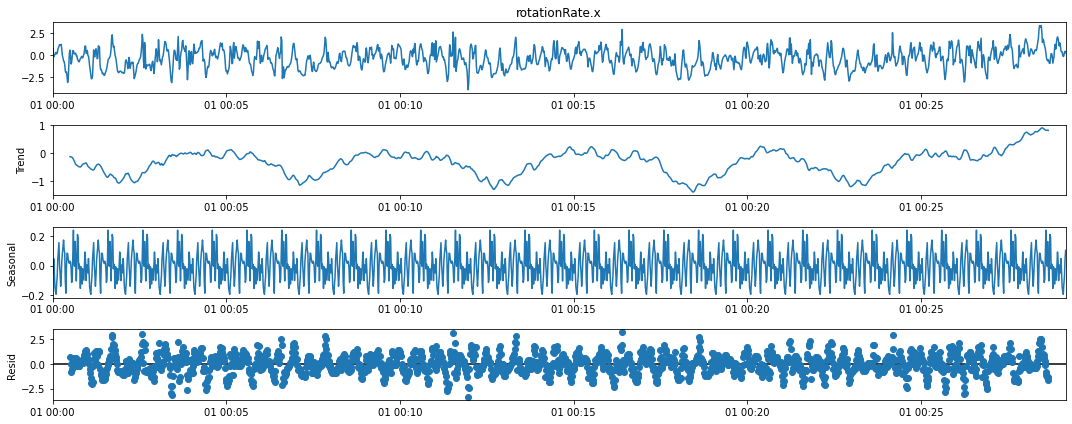

In [60]:
# Decompose the dataframe with the target column 'rotationRate.x'
ts2 = sensor['rotationRate.x']
decomposition2 = seasonal_decompose(ts2, period=60)
decomposition2.plot()

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [61]:
# import adfuller

from statsmodels.tsa.stattools import adfuller

In [62]:
# adfuller test for variable userAcceleration.x
# pvalue, which is the second variable of the output obtained, is smaller than 0.05

adfuller(ts1)

(-17.95799408616975,
 2.823439483037483e-30,
 4,
 1746,
 {'1%': -3.434100824760071,
  '5%': -2.863196780129223,
  '10%': -2.5676520210882936},
 -727.6140124402791)

In [63]:
# adfulelr test for variable rotationRate.x
# pvalue, which is the second variable of the output obtained, is smaller than 0.05

adfuller(ts2)

(-5.269860625086423,
 6.320230335912132e-06,
 25,
 1725,
 {'1%': -3.4341465551936534,
  '5%': -2.863216966926812,
  '10%': -2.567662770090317},
 2619.6049719981947)

What are your conclusions from this test?

In [13]:
# From the Fuller test we can conclude that we can reject the null hypothesis that the time series for the variable userAcceleration.x and the variable rotationRate.x are not stationary